# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated",
                                        5: "Never married", 6: "Living with partner", 77: "Refused",
                                        99: "Don't know"})

da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
print("Status frequency table - All people\n")
print(da.DMDMARTLx.value_counts(), "\n")

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

male = da.loc[da["RIAGENDRx"] == "Male"]
print("Status frequency table - Male\n")
print(male["DMDMARTLx"].value_counts(), "\n")

female = da.loc[da["RIAGENDRx"] == "Female"]
print("Status frequency table - Female\n")
print(female["DMDMARTLx"].value_counts(), "\n")

# print(da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts(), "\n") shows both men and female

# age_interval = (da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)
# da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])

age_interval_all = da.loc[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)]
print("Status frequency table - All people with age between 30-40\n")
print(age_interval_all["DMDMARTLx"].value_counts(), "\n")

age_interval_male = da.loc[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40) & (da.RIAGENDRx == "Male")]
print("Status frequency table - Men with age between 30-40\n")
print(age_interval_male["DMDMARTLx"].value_counts(), "\n")

age_interval_female = da.loc[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40) & (da.RIAGENDRx == "Female")]
print("Status frequency table - Women with age between 30-40\n")
print(age_interval_female["DMDMARTLx"].value_counts(), "\n")

# print(da.groupby("agegrp")["DMDMARTLx"].value_counts(), "\n")
# print(da.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"].value_counts(), "\n")
da.columns

Status frequency table - All people

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64 

Status frequency table - Male

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64 

Status frequency table - Female

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64 

Status frequency table - All people with age between 30-40

Married                560
Never married          217
Living with partn

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDMARTLx', 'RIAGENDRx'],
      dtype='object')

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [15]:
# Female
print("Women distribution of marital status within intervals\n")
da["agegrpfm"] = pd.cut(female.RIDAGEYR, [10, 20, 30, 40, 50, 70, 80])
x = da.groupby("agegrpfm")["DMDMARTLx"]
x = x.value_counts()
x = x / x.sum()
print(x, "\n")

# Male
print("Men distribution of marital status within intervals\n")
da["agegrpm"] = pd.cut(male.RIDAGEYR, [10, 20, 30, 40, 50, 70, 80])
y = da.groupby("agegrpm")["DMDMARTLx"]
y = y.value_counts()
y = y / y.sum()
print(y)

Women distribution of marital status within intervals

agegrpfm  DMDMARTLx          
(10, 20]  Missing                0.042339
          Never married          0.010081
          Living with partner    0.002688
          Married                0.000336
(20, 30]  Never married          0.076949
          Married                0.052755
          Living with partner    0.035618
          Divorced               0.003696
          Separated              0.003696
(30, 40]  Married                0.086694
          Never married          0.032594
          Living with partner    0.019153
          Divorced               0.014449
          Separated              0.005712
          Widowed                0.000672
(40, 50]  Married                0.096774
          Divorced               0.023185
          Never married          0.021169
          Living with partner    0.012433
          Separated              0.011089
          Widowed                0.004032
(50, 70]  Married                

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

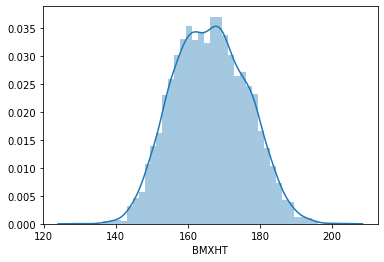

In [22]:
sns.distplot(da.BMXHT.dropna())

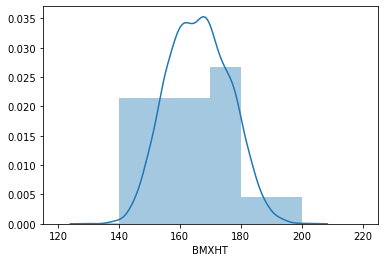

In [18]:
sns.distplot(da.BMXHT.dropna(), bins=[120, 130, 140, 170, 180, 200, 220])

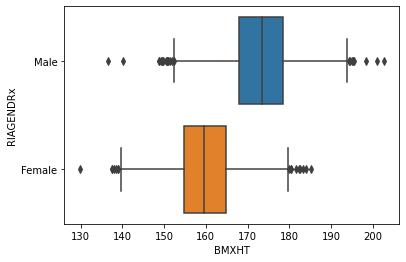

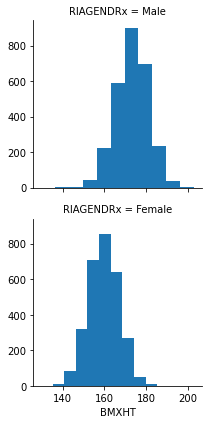

In [27]:
sns.boxplot(x = da["BMXHT"], y = da["RIAGENDRx"])

g = sns.FacetGrid(da, row = "RIAGENDRx")
g = g.map(plt.hist, "BMXHT")

plt.show()

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

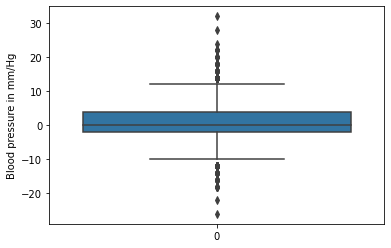

In [34]:
diff = da.loc[:, "BPXSY1"] - da.loc[:, "BPXSY2"]
bp = sns.boxplot(data=diff)
bp.set_ylabel("Blood pressure in mm/Hg")
plt.show()

In [30]:
# Proportion of the subjects which have a lower SBP on the second reading compared to the first
print(np.mean(da.BPXSY1 > da.BPXSY2))

0.42946817785527464


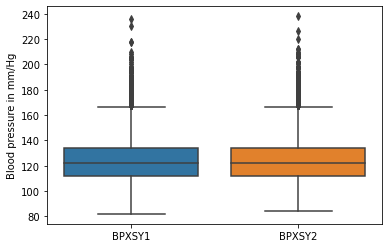

In [31]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
bp.set_ylabel("Blood pressure in mm/Hg")
plt.show()

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [41]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "Less than 9th", 2: "9-11th", 3: "High School", 4: "College/AA",
                                       5: "College", 7: "Refused", 9: "Don't know"})
hh_ea = da.groupby("DMDEDUC2x")["DMDHHSIZ"].value_counts()
hh_ea = hh_ea / hh_ea.sum()
print(hh_ea)

DMDEDUC2x      DMDHHSIZ
9-11th         2           0.026123
               3           0.019182
               4           0.017903
               5           0.017172
               1           0.013701
               6           0.013336
               7           0.010047
College        2           0.086774
               3           0.048411
               4           0.041286
               1           0.035623
               5           0.023749
               6           0.007307
               7           0.006394
College/AA     2           0.079649
               3           0.057179
               4           0.050055
               1           0.044757
               5           0.036171
               6           0.014980
               7           0.013336
Don't know     2           0.000365
               5           0.000183
High School    2           0.058641
               3           0.037084
               4           0.035075
               1           0.033065
    

In [49]:
hh_ea_gndr = da.loc[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)]
hh_ea_gndr = hh_ea_gndr.groupby(["RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].value_counts()
hh_ea_gndr = hh_ea_gndr / hh_ea_gndr.sum()
print(hh_ea_gndr)

RIAGENDRx  DMDEDUC2x      DMDHHSIZ
Female     9-11th         5           0.012671
                          6           0.009747
                          4           0.008772
                          2           0.007797
                          7           0.003899
                                        ...   
Male       Less than 9th  5           0.011696
                          3           0.006823
                          4           0.006823
                          6           0.004873
                          2           0.001949
Name: DMDHHSIZ, Length: 69, dtype: float64


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [61]:
sdmvstra = da["SDMVSTRA"].unique()
sdmppsu = da["SDMVPSU"].unique()
mvu_s = []

for i in range(0, len(sdmvstra)):
    for j in range(0, len(sdmppsu)):
        mvu_s.append(da.loc[(da.SDMVSTRA == sdmvstra[i]) & (da.SDMVPSU == sdmppsu[j])])


min_age_m = da.RIDAGEYR.max()
min_age_f = da.RIDAGEYR.max()
min_height_m = da.BMXHT.max()
min_height_f = da.BMXHT.max()
min_bmi_m = da.BMXBMI.max()
min_bmi_f = da.BMXBMI.max()

max_age_m = da.RIDAGEYR.min()
max_age_f = da.RIDAGEYR.min()
max_height_m = da.BMXHT.min()
max_height_f = da.BMXHT.min()
max_bmi_m = da.BMXBMI.min()
max_bmi_f = da.BMXBMI.min()
        
for i in range(len(mvu_s)):
    print("MVU #" + str(i + 1), "\n")
    
    male = mvu_s[i].loc[mvu_s[i].RIAGENDRx == "Male"]
    female = mvu_s[i].loc[mvu_s[i].RIAGENDRx == "Female"]
    
    print("Male")
    print("Mean age: " + str(np.mean(male.RIDAGEYR)))
    print("Mean height: " + str(np.mean(male.BMXHT)))
    print("Mean BMI: " + str(np.mean(male.BMXBMI)))
    if np.mean(male.RIDAGEYR) > max_age_m:
        max_age_m = np.mean(male.RIDAGEYR)
    elif np.mean(male.RIDAGEYR) < min_age_m:
        min_age_m = np.mean(male.RIDAGEYR)
    if np.mean(male.BMXHT) > max_height_m:
        max_height_m = np.mean(male.BMXHT)
    elif np.mean(male.BMXHT) < min_height_m:
        min_height_m = np.mean(male.BMXHT)
    if np.mean(male.BMXBMI) > max_bmi_m:
        max_bmi_m = np.mean(male.BMXBMI)
    elif np.mean(male.BMXBMI) < min_bmi_m:
        min_bmi_m = np.mean(male.BMXBMI)
    print("IQR age: " + str(male.RIDAGEYR.quantile(0.75) - male.RIDAGEYR.quantile(0.25)))
    print("IQR height: " + str(male.BMXHT.quantile(0.75) - male.BMXHT.quantile(0.25)))
    print("IQR bmi: " + str(male.BMXBMI.quantile(0.75) - male.BMXBMI.quantile(0.25)), "\n")
    
    print("Female")
    print("Mean age: " + str(np.mean(female.RIDAGEYR)))
    print("Mean height: " + str(np.mean(female.BMXHT)))
    print("Mean BMI: " + str(np.mean(female.BMXBMI)))
    if np.mean(female.RIDAGEYR) > max_age_f:
        max_age_f = np.mean(female.RIDAGEYR)
    elif np.mean(female.RIDAGEYR) < min_age_f:
        min_age_f = np.mean(female.RIDAGEYR)
    if np.mean(female.BMXHT) > max_height_f:
        max_height_f = np.mean(female.BMXHT)
    elif np.mean(female.BMXHT) < min_height_f:
        min_height_f = np.mean(female.BMXHT)
    if np.mean(female.BMXBMI) > max_bmi_f:
        max_bmi_f = np.mean(female.BMXBMI)
    elif np.mean(female.BMXBMI) < min_bmi_f:
        min_bmi_f = np.mean(female.BMXBMI)
    print("IQR age: " + str(male.RIDAGEYR.quantile(0.75) - male.RIDAGEYR.quantile(0.25)))
    print("IQR height: " + str(male.BMXHT.quantile(0.75) - male.BMXHT.quantile(0.25)))
    print("IQR bmi: " + str(male.BMXBMI.quantile(0.75) - male.BMXBMI.quantile(0.25)))
    print("-----------------------------------")

print("Male")
print("Max age: " + str(max_age_m))
print("Min age: " + str(min_age_m))
print("Ratio: " + str(min_age_m / max_age_m))
print("Max height: " + str(max_height_m))
print("Min height: " + str(min_height_m))
print("Ratio: " + str(min_height_m / max_height_m))
print("Max bmi: " + str(max_bmi_m))
print("Min bmi: " + str(min_bmi_m))
print("Ratio: " + str(min_bmi_m / max_bmi_m), "\n")

print("Female")
print("Max age: " + str(max_age_f))
print("Min age: " + str(min_age_f))
print("Ratio: " + str(min_age_f / max_age_f))
print("Max height:" + str(max_height_f))
print("Min height: " + str(min_height_f))
print("Ratio: " + str(min_height_f / max_height_f))
print("Max bmi: " + str(max_bmi_f))
print("Min bmi: " + str(min_bmi_f))
print("Ratio: " + str(min_bmi_f / max_bmi_f))

MVU #1 

Male
Mean age: 55.16528925619835
Mean height: 173.63109243697477
Mean BMI: 29.727731092436986
IQR age: 29.0
IQR height: 10.349999999999994
IQR bmi: 8.3 

Female
Mean age: 50.9009009009009
Mean height: 160.76238532110088
Mean BMI: 30.385321100917423
IQR age: 29.0
IQR height: 10.349999999999994
IQR bmi: 8.3
-----------------------------------
MVU #2 

Male
Mean age: 49.705882352941174
Mean height: 174.45686274509802
Mean BMI: 29.143564356435636
IQR age: 33.5
IQR height: 7.925000000000011
IQR bmi: 7.899999999999999 

Female
Mean age: 51.66
Mean height: 160.02142857142866
Mean BMI: 28.564285714285717
IQR age: 33.5
IQR height: 7.925000000000011
IQR bmi: 7.899999999999999
-----------------------------------
MVU #3 

Male
Mean age: 53.14018691588785
Mean height: 175.61047619047616
Mean BMI: 28.259615384615394
IQR age: 36.0
IQR height: 10.5
IQR bmi: 7.525000000000002 

Female
Mean age: 54.8936170212766
Mean height: 161.98936170212767
Mean BMI: 30.061702127659576
IQR age: 36.0
IQR heig

IQR height: 9.350000000000023
IQR bmi: 8.049999999999997 

Female
Mean age: 44.8411214953271
Mean height: 162.05961538461537
Mean BMI: 29.905769230769238
IQR age: 28.25
IQR height: 9.350000000000023
IQR bmi: 8.049999999999997
-----------------------------------
MVU #26 

Male
Mean age: 52.12658227848101
Mean height: 174.45443037974678
Mean BMI: 28.811392405063284
IQR age: 31.5
IQR height: 9.899999999999977
IQR bmi: 8.100000000000001 

Female
Mean age: 46.45744680851064
Mean height: 160.47659574468085
Mean BMI: 30.641489361702124
IQR age: 31.5
IQR height: 9.899999999999977
IQR bmi: 8.100000000000001
-----------------------------------
MVU #27 

Male
Mean age: 50.51685393258427
Mean height: 176.9741573033708
Mean BMI: 30.337078651685378
IQR age: 36.0
IQR height: 9.900000000000006
IQR bmi: 6.700000000000003 

Female
Mean age: 47.810526315789474
Mean height: 161.97789473684205
Mean BMI: 30.7
IQR age: 36.0
IQR height: 9.900000000000006
IQR bmi: 6.700000000000003
----------------------------

In [59]:
print(da.SDMVSTRA.describe())
print(da.SDMVPSU.describe())
print(da.groupby(["SDMVSTRA", "SDMVPSU"]).size())

count    5735.000000
mean      126.236617
std         4.244406
min       119.000000
25%       123.000000
50%       126.000000
75%       130.000000
max       133.000000
Name: SDMVSTRA, dtype: float64
count    5735.000000
mean        1.487881
std         0.499897
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: SDMVPSU, dtype: float64
SDMVSTRA  SDMVPSU
119       1          170
          2          127
120       1          199
          2          145
121       1          202
          2          188
122       1          176
          2          190
123       1          201
          2          173
124       1          237
          2          129
125       1          232
          2          202
126       1          180
          2          195
127       1          195
          2          194
128       1          231
          2          157
129       1          184
          2          206
130       1          184
          